## Описательная статистика. Качественные и количественные характеристики популяции. Графическое представление данных

### Задача 1

Даны значения зарплат из выборки выпускников:

100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150

Используя только встроенные питоновские функции и структуры данных (т.е. без библиотек numpy, pandas и др.) посчитать среднее арифметическое, выборочную дисперсию, среднее квадратичное отклонение для данной выборки.

Можно затем посчитать те же значения с использованием библиотек, чтобы проверить себя.

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
salary = [100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150]

#### Cреднее арифметическое

In [3]:
salary_mean = sum(salary) / len(salary)
print(f'Среднее арифметическое: {salary_mean}')

Среднее арифметическое: 73.14285714285714


#### Выборочная дисперсия

In [13]:
un_dispersion = sum(pow((i - salary_mean), 2) for i in salary) / (len(salary) - 1)
dispersion = sum(pow((i - salary_mean), 2) for i in salary) / len(salary)
print(f'Несмещённая оценка дисперсии: {un_dispersion}')
print(f'Cмещённая оценка дисперсии: {dispersion}')

Несмещённая оценка дисперсии: 2241.8285714285716
Cмещённая оценка дисперсии: 2135.074829931973


#### Cреднее квадратичное отклонение 

In [14]:
print(f'Несмещённое: {pow(un_dispersion, 0.5)}')
print(f'Cмещённое: {pow(dispersion, 0.5)}')

Несмещённое: 47.34795213553139
Cмещённое: 46.20686994302874


### С помощью библиотек

In [18]:
df = pd.DataFrame({'salary': salary})
# среднее арифметическое
print(df['salary'].mean())
# несмещённая оценка дисперсии
print(df['salary'].var(ddof=1))
# смещённая оценка дисперсии
print(df['salary'].var(ddof=0))
# среднее квадратичное отклонение (несмещённоe)
print(df['salary'].std(ddof=1))
# среднее квадратичное отклонение (смещённоe)
print(df['salary'].std(ddof=0))

73.14285714285714
2241.8285714285716
2135.074829931973
47.34795213553139
46.20686994302874


### Задача 2

Для выборки из задачи 1 найти (также без использования библиотек):
1. медиану, первый и третий квартили, интерквартильное расстояние,
2. выборсы в выборке (используя для этого метод как при построении "усов" из boxplot).

Возможные неоднозначности в вычислении квантилей можно разрешать любым способом.

#### Медиана

In [22]:
sort_salary = sorted(salary)
print(sort_salary)

[17, 24, 25, 30, 33, 45, 55, 57, 65, 65, 70, 75, 75, 77, 80, 84, 89, 90, 100, 150, 230]


In [23]:
median = sort_salary[len(sort_salary) // 2]
median

70

#### Первый и Третий квартили

In [27]:
first_quartile = sort_salary[int(len(salary) / 4)]
print(f'Первый квартиль: {first_quartile}')

Первый квартиль: 45


In [28]:
third_quartile = sort_salary[int(len(salary) * 3 / 4)]
print(f'Третий квартиль: {third_quartile}')

Третий квартиль: 84


#### Интерквартильное расстояние

In [34]:
# Это расстояние от Первого до Третьего квартиля
print(f'Интерквартильное расстояние: {first_quartile, third_quartile}')

Интерквартильное расстояние: (45, 84)


#### Выборсы в выборке

In [33]:
IQR = third_quartile - first_quartile
for i in sort_salary:
    if i < first_quartile - 1.5 * IQR or i > third_quartile + 1.5 * IQR:
        print(f'Выброс с зарплатой = {i}')

Выброс с зарплатой = 150
Выброс с зарплатой = 230


### С помощью библиотек

In [38]:
# Медиана, Первый квартиль, Третий квартиль
print(df['salary'].quantile([0.25, 0.5, 0.75]))

0.25    45.0
0.50    70.0
0.75    84.0
Name: salary, dtype: float64


In [39]:
# Интерквартильное расстояние
print(np.quantile(salary, [0.25, 0.75]))

[45. 84.]


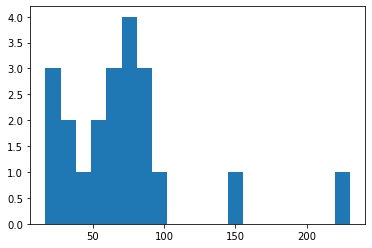

In [48]:
plt.hist(df['salary'], bins = 20)
plt.show()

### Задача 3

В университет на факультет A поступило 100 человек, на факультет B - 90 человек и на факультет C - 45 человек. Вероятность того, что студент с факультета A сдаст первую сессию, равна 0.6. Для студента с факультета B эта вероятность равна 0.7, а для студента с факультета C - 0.8. Случайным образом выбирается студент, сдавший первую сессию. Какое событие наиболее вероятно:
1. студент учится на факультете A,
2. студент учится на факультете B,
3. студент учится на факультете C?

Для решения данной задачи воспользуемся Формулой полной вероятности. Формулой Байеса

__Формула полной вероятности__ для таких событий и произвольного события $A$:
$$P(A) = P(A | H_1) \cdot P(H_1) + P(A | H_2) \cdot P(H_2) + \dots + P(A | H_n) \cdot P(H_n).$$

__Формула Байеса__:
$$P(A|B) = \dfrac{P(B|A) \cdot P(A)}{P(B)}$$

In [54]:
#Количество студентов на факультете
facA = 100 / (100 + 90 + 45)
facB = 90 / (100 + 90 + 45)
facC = 45 / (100 + 90 + 45)

#Вероятность того, что студент сдаст первую сессию с определенного факультета
P_facA = 0.6
P_facB = 0.7
P_facC = 0.8

In [55]:
#Формула полной вероятности
P_A = P_facA * facA + P_facB * facB + P_facC * facC
P_A

0.676595744680851

In [56]:
def Bayes(P_fac: float, fac: float, P_A: float):
    '''Формула Байеса'''
    
    return (P_fac * fac) / P_A

In [59]:
print(f'Вероятность того, что студент с факультета А: {Bayes(P_fac=P_facA, fac=facA, P_A=P_A)}')

Вероятность того, что студент с факультета А: 0.3773584905660377


In [60]:
print(f'Вероятность того, что студент с факультета B: {Bayes(P_fac=P_facB, fac=facB, P_A=P_A)}')

Вероятность того, что студент с факультета B: 0.39622641509433965


In [61]:
print(f'Вероятность того, что студент с факультета C: {Bayes(P_fac=P_facC, fac=facC, P_A=P_A)}')

Вероятность того, что студент с факультета C: 0.22641509433962265


__Ответ:__ Студент учится на факультете В